<a href="https://colab.research.google.com/github/kridtapon/7-unique-moving-average-ALMA-LSMA-PRMA-MMA-QMA-RMA-MGMA/blob/main/7_unique_moving_average_ALMA%2CLSMA%2CPRMA%2CMMA%2CQMA%2CRMA%2CMGMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.8 MB/s eta 0:00:00


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


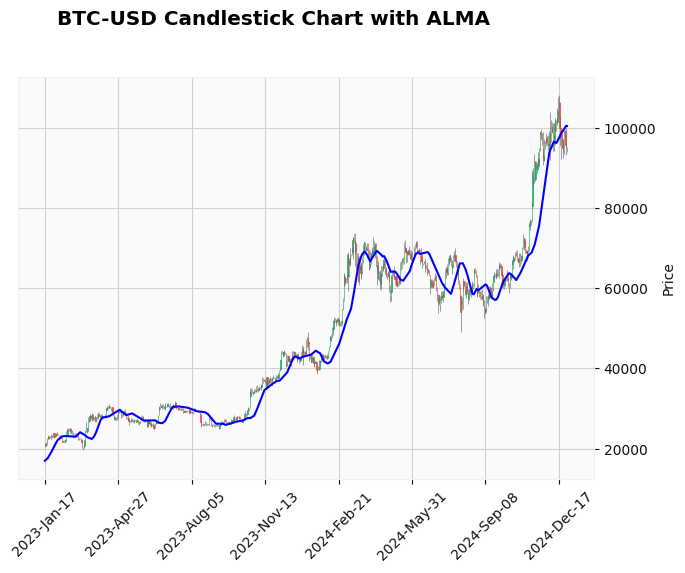

In [10]:
import numpy as np
import yfinance as yf
import mplfinance as mpf

# Define the ALMA function
def alma(series, window, offset=0.85, sigma=6):
    w = np.exp(-0.5 * ((np.arange(window) - offset * (window - 1)) / sigma) ** 2)
    w /= w.sum()
    return np.convolve(series, w, mode='valid')

# Define the stock symbol and time period
symbol = 'BTC-USD'
start_date = '2022-12-29'
end_date = '2024-12-29'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)

# Ensure the columns are named correctly for mplfinance
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Apply ALMA to the 'Close' price
window = 20  # Window size for ALMA
alma_series = alma(df['Close'].values, window)

# Align ALMA output with the original data (valid convolution shortens the series)
df = df.iloc[window - 1:]  # Trim original data to match ALMA length
df['ALMA'] = alma_series

# Prepare the ALMA line for mplfinance
alma_plot = mpf.make_addplot(df['ALMA'], color='blue', width=1.5)  # Use 'width' instead of 'linewidth'

# Plot the candlestick chart with ALMA overlay
mpf.plot(
    df,
    type='candle',
    addplot=alma_plot,
    title=f'{symbol} Candlestick Chart with ALMA',
    style='yahoo',
    ylabel='Price'
)


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


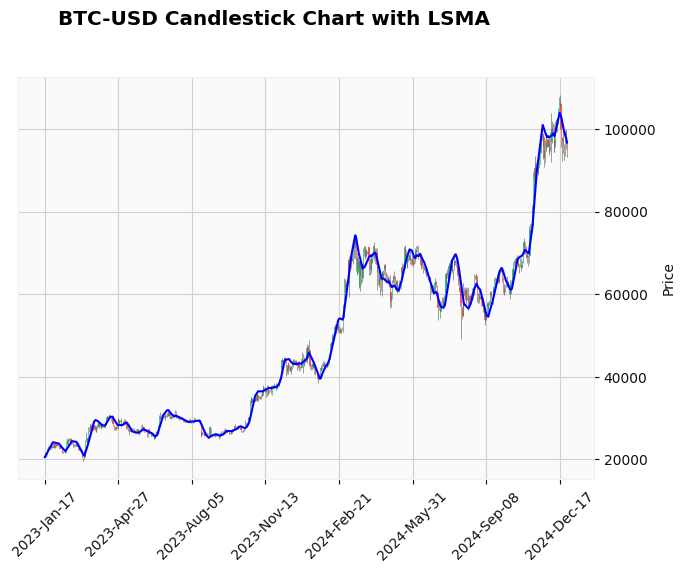

In [11]:
import numpy as np
import yfinance as yf
import mplfinance as mpf

# Define the LSMA function
def lsma(series, window):
    return [np.polyval(np.polyfit(range(window), series[i:i+window], 1), window-1)
            for i in range(len(series) - window + 1)]

# Define the stock symbol and time period
symbol = 'BTC-USD'
start_date = '2022-12-29'
end_date = '2024-12-29'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)

# Ensure the columns are named correctly for mplfinance
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Apply LSMA to the 'Close' price
window = 20  # Window size for LSMA
lsma_series = lsma(df['Close'].values, window)

# Align LSMA output with the original data (to match the shortened series length)
df = df.iloc[window - 1:]  # Trim original data to match LSMA length
df['LSMA'] = lsma_series

# Prepare the LSMA line for mplfinance
lsma_plot = mpf.make_addplot(df['LSMA'], color='blue', width=1.5)  # Use 'width' instead of 'linewidth'

# Plot the candlestick chart with LSMA overlay
mpf.plot(
    df,
    type='candle',
    addplot=lsma_plot,
    title=f'{symbol} Candlestick Chart with LSMA',
    style='yahoo',
    ylabel='Price'
)


[*********************100%***********************]  1 of 1 completed
<ipython-input-12-08157bd73286>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PRMA'] = prma_series
/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


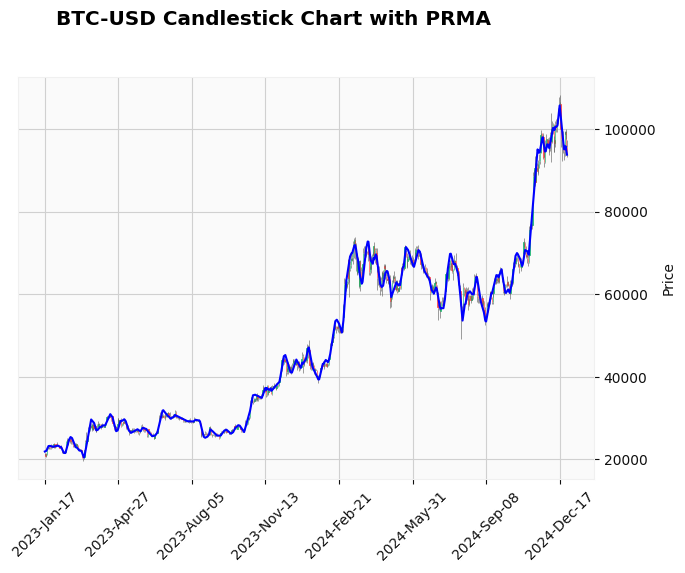

In [12]:
import numpy as np
import yfinance as yf
import mplfinance as mpf

# Define the Polynomial Regression Moving Average (PRMA) function
def prma(series, window, degree=2):
    return [np.polyval(np.polyfit(range(window), series[i:i+window], degree), window-1)
            for i in range(len(series) - window + 1)]

# Define the stock symbol and time period
symbol = 'BTC-USD'
start_date = '2022-12-29'
end_date = '2024-12-29'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)

# Ensure the columns are named correctly for mplfinance
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Apply PRMA to the 'Close' price
window = 20  # Window size for PRMA
prma_series = prma(df['Close'].values, window)

# Align PRMA output with the original data (shortens the series)
df = df.iloc[window - 1:]  # Trim original data to match PRMA length
df['PRMA'] = prma_series

# Prepare the PRMA line for mplfinance
prma_plot = mpf.make_addplot(df['PRMA'], color='blue', width=1.5)  # Use 'width' instead of 'linewidth'

# Plot the candlestick chart with PRMA overlay
mpf.plot(
    df,
    type='candle',
    addplot=prma_plot,
    title=f'{symbol} Candlestick Chart with PRMA',
    style='yahoo',
    ylabel='Price'
)


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


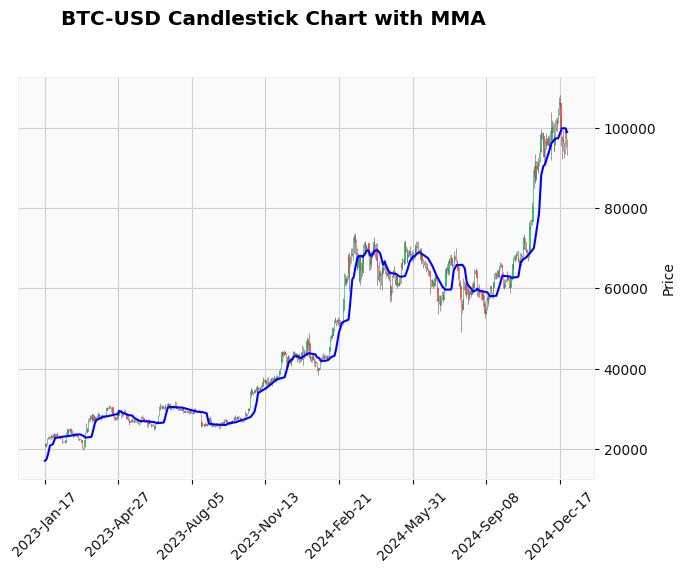

In [20]:
import numpy as np
import yfinance as yf
import mplfinance as mpf

# Define the MMA function
def mma(series, window):
    return [np.median(series[i:i+window]) for i in range(len(series) - window + 1)]

# Define the stock symbol and time period
symbol = 'BTC-USD'
start_date = '2022-12-29'
end_date = '2024-12-29'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)

# Ensure the columns are named correctly for mplfinance
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Apply MMA to the 'Close' price
window = 20  # Window size for MMA
mma_series = mma(df['Close'].values, window)

# Align MMA output with the original data (since MMA reduces the length)
df = df.iloc[window - 1:]  # Trim original data to match MMA length
df['MMA'] = mma_series

# Prepare the MMA line for mplfinance
mma_plot = mpf.make_addplot(df['MMA'], color='blue', width=1.5)  # Use 'width' instead of 'linewidth'

# Plot the candlestick chart with MMA overlay
mpf.plot(
    df,
    type='candle',
    addplot=mma_plot,
    title=f'{symbol} Candlestick Chart with MMA',
    style='yahoo',
    ylabel='Price'
)


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


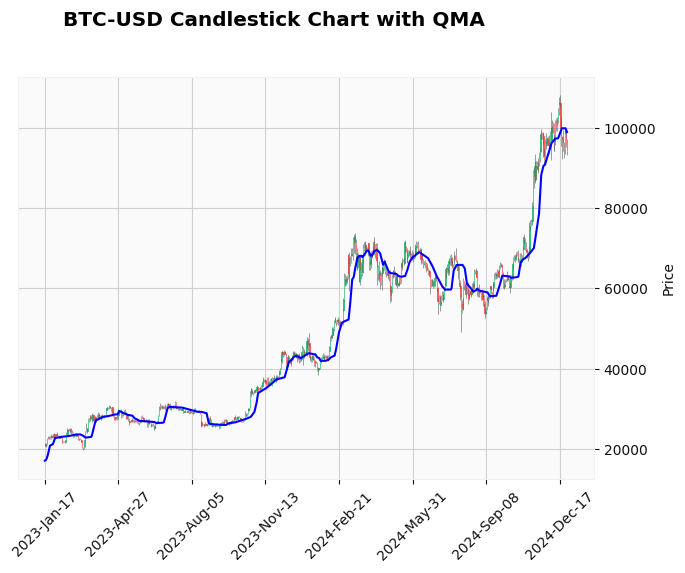

In [21]:
import numpy as np
import yfinance as yf
import mplfinance as mpf

# Define the Quantile Moving Average function
def qma(series, window, quantile=0.5):
    return [np.quantile(series[i:i+window], quantile) for i in range(len(series) - window + 1)]

# Define the stock symbol and time period
symbol = 'BTC-USD'
start_date = '2022-12-29'
end_date = '2024-12-29'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)

# Ensure the columns are named correctly for mplfinance
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Apply QMA to the 'Close' price
window = 20  # Window size for QMA
qma_series = qma(df['Close'].values, window)

# Align QMA output with the original data (QMA reduces the series length by window-1)
df = df.iloc[window - 1:]  # Trim original data to match QMA length
df['QMA'] = qma_series

# Prepare the QMA line for mplfinance
qma_plot = mpf.make_addplot(df['QMA'], color='blue', width=1.5)  # Use 'width' instead of 'linewidth'

# Plot the candlestick chart with QMA overlay
mpf.plot(
    df,
    type='candle',
    addplot=qma_plot,
    title=f'{symbol} Candlestick Chart with QMA',
    style='yahoo',
    ylabel='Price'
)


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


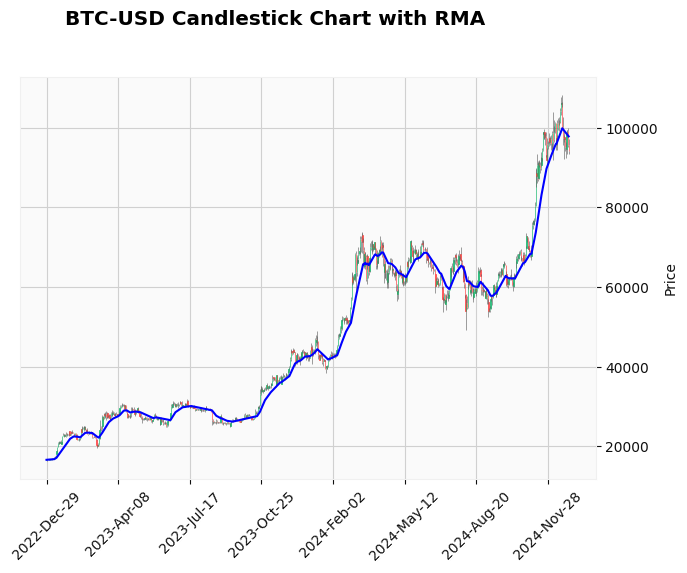

In [22]:
import numpy as np
import yfinance as yf
import mplfinance as mpf

# Define the Recursive Moving Average function (RMA)
def rma(series, alpha=0.1):
    rma_values = [series[0]]
    for i in range(1, len(series)):
        rma_values.append(alpha * series[i] + (1 - alpha) * rma_values[-1])
    return np.array(rma_values)

# Define the stock symbol and time period
symbol = 'BTC-USD'
start_date = '2022-12-29'
end_date = '2024-12-29'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)

# Ensure the columns are named correctly for mplfinance
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Apply RMA to the 'Close' price
alpha = 0.1  # Alpha for RMA (you can adjust this value)
rma_series = rma(df['Close'].values, alpha)

# Align RMA output with the original data
df['RMA'] = rma_series

# Prepare the RMA line for mplfinance
rma_plot = mpf.make_addplot(df['RMA'], color='blue', width=1.5)  # Use 'width' instead of 'linewidth'

# Plot the candlestick chart with RMA overlay
mpf.plot(
    df,
    type='candle',
    addplot=rma_plot,
    title=f'{symbol} Candlestick Chart with RMA',
    style='yahoo',
    ylabel='Price'
)


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


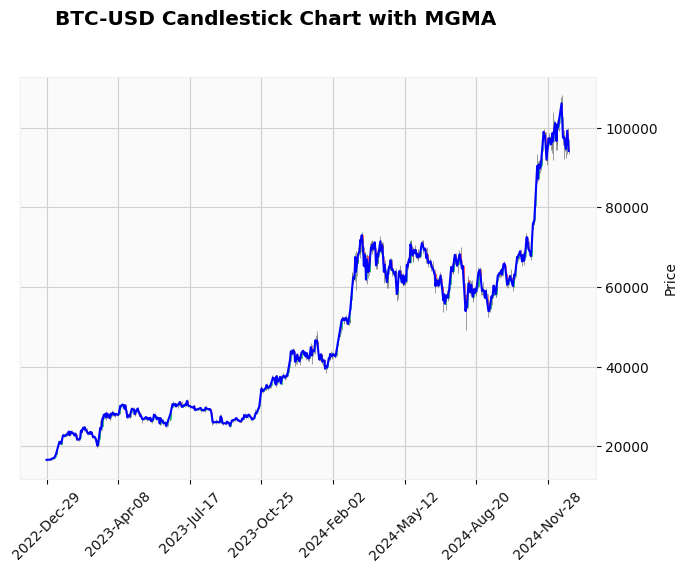

In [23]:
import numpy as np
import yfinance as yf
import mplfinance as mpf

# Define the McGinley Dynamic (MGMA) function
def mgma(series, window):
    mg = [series[0]]  # Start with the first value
    for i in range(1, len(series)):
        mg.append(mg[-1] + (series[i] - mg[-1]) / max(1, (series[i] / mg[-1]) ** 2))  # MGMA formula
    return mg

# Define the stock symbol and time period
symbol = 'BTC-USD'
start_date = '2022-12-29'
end_date = '2024-12-29'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)

# Ensure the columns are named correctly for mplfinance
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Apply MGMA to the 'Close' price
window = 20  # Window size for MGMA
mgma_series = mgma(df['Close'].values, window)

# Align MGMA output with the original data (MGMA is calculated from the first value, so we don't need to trim data)
df['MGMA'] = mgma_series

# Prepare the MGMA line for mplfinance
mgma_plot = mpf.make_addplot(df['MGMA'], color='blue', width=1.5)  # Use 'width' instead of 'linewidth'

# Plot the candlestick chart with MGMA overlay
mpf.plot(
    df,
    type='candle',
    addplot=mgma_plot,
    title=f'{symbol} Candlestick Chart with MGMA',
    style='yahoo',
    ylabel='Price'
)


[*********************100%***********************]  1 of 1 completed


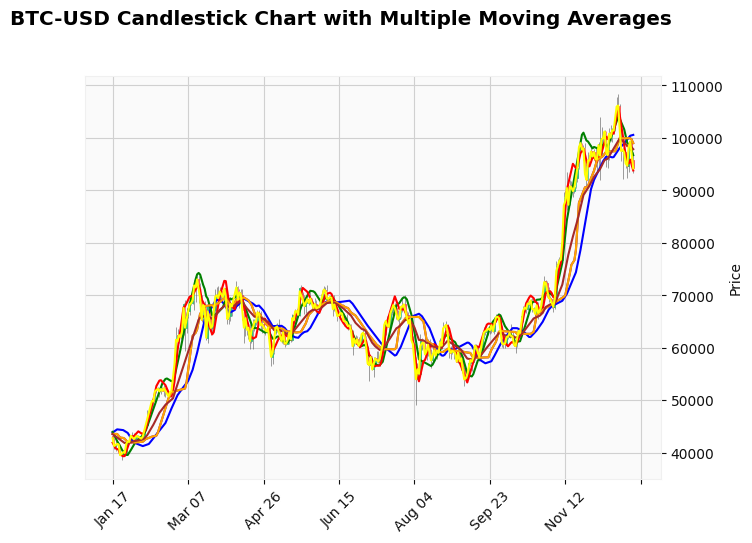

In [27]:
import numpy as np
import yfinance as yf
import mplfinance as mpf

# Define the ALMA function
def alma(series, window, offset=0.85, sigma=6):
    w = np.exp(-0.5 * ((np.arange(window) - offset * (window - 1)) / sigma) ** 2)
    w /= w.sum()
    return np.convolve(series, w, mode='valid')

# Define the LSMA function
def lsma(series, window):
    return [np.polyval(np.polyfit(range(window), series[i:i+window], 1), window-1)
            for i in range(len(series) - window + 1)]

# Define the PRMA function
def prma(series, window, degree=2):
    return [np.polyval(np.polyfit(range(window), series[i:i+window], degree), window-1)
            for i in range(len(series) - window + 1)]

# Define the MMA function
def mma(series, window):
    return [np.median(series[i:i+window]) for i in range(len(series) - window + 1)]

# Define the QMA function
def qma(series, window, quantile=0.5):
    return [np.quantile(series[i:i+window], quantile) for i in range(len(series) - window + 1)]

# Define the RMA function
def rma(series, alpha=0.1):
    rma_values = [series[0]]
    for i in range(1, len(series)):
        rma_values.append(alpha * series[i] + (1 - alpha) * rma_values[-1])
    return np.array(rma_values)

# Define the MGMA function
def mgma(series, window):
    mg = [series[0]]
    for i in range(1, len(series)):
        mg.append(mg[-1] + (series[i] - mg[-1]) / max(1, (series[i] / mg[-1]) ** 2))
    return mg

# Define the stock symbol and time period
symbol = 'BTC-USD'
start_date = '2023-12-29'
end_date = '2024-12-29'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)

# Ensure the columns are named correctly for mplfinance
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Apply each moving average to the 'Close' price
window = 20  # Window size for moving averages
alma_series = alma(df['Close'].values, window)
lsma_series = lsma(df['Close'].values, window)
prma_series = prma(df['Close'].values, window)
mma_series = mma(df['Close'].values, window)
qma_series = qma(df['Close'].values, window)
rma_series = rma(df['Close'].values, alpha=0.1)
mgma_series = mgma(df['Close'].values, window)

# Align moving average outputs with the original data (valid convolution shortens the series)
df_trimmed = df.iloc[window - 1:].copy()  # Trim original data to match moving average lengths

# Add moving averages to the trimmed dataframe
df_trimmed['ALMA'] = alma_series
df_trimmed['LSMA'] = lsma_series
df_trimmed['PRMA'] = prma_series
df_trimmed['MMA'] = mma_series
df_trimmed['QMA'] = qma_series
df_trimmed['RMA'] = rma_series[-len(df_trimmed):]  # Align RMA length to the trimmed dataframe
df_trimmed['MGMA'] = mgma_series[-len(df_trimmed):]  # Align MGMA length to the trimmed dataframe

# Prepare the moving average lines for mplfinance
alma_plot = mpf.make_addplot(df_trimmed['ALMA'], color='blue', width=1.5)
lsma_plot = mpf.make_addplot(df_trimmed['LSMA'], color='green', width=1.5)
prma_plot = mpf.make_addplot(df_trimmed['PRMA'], color='red', width=1.5)
mma_plot = mpf.make_addplot(df_trimmed['MMA'], color='purple', width=1.5)
qma_plot = mpf.make_addplot(df_trimmed['QMA'], color='orange', width=1.5)
rma_plot = mpf.make_addplot(df_trimmed['RMA'], color='brown', width=1.5)
mgma_plot = mpf.make_addplot(df_trimmed['MGMA'], color='yellow', width=1.5)

# Plot the candlestick chart with all moving averages overlay
mpf.plot(
    df_trimmed,
    type='candle',
    addplot=[alma_plot, lsma_plot, prma_plot, mma_plot, qma_plot, rma_plot, mgma_plot],
    title=f'{symbol} Candlestick Chart with Multiple Moving Averages',
    style='yahoo',
    ylabel='Price'
)


[*********************100%***********************]  1 of 1 completed


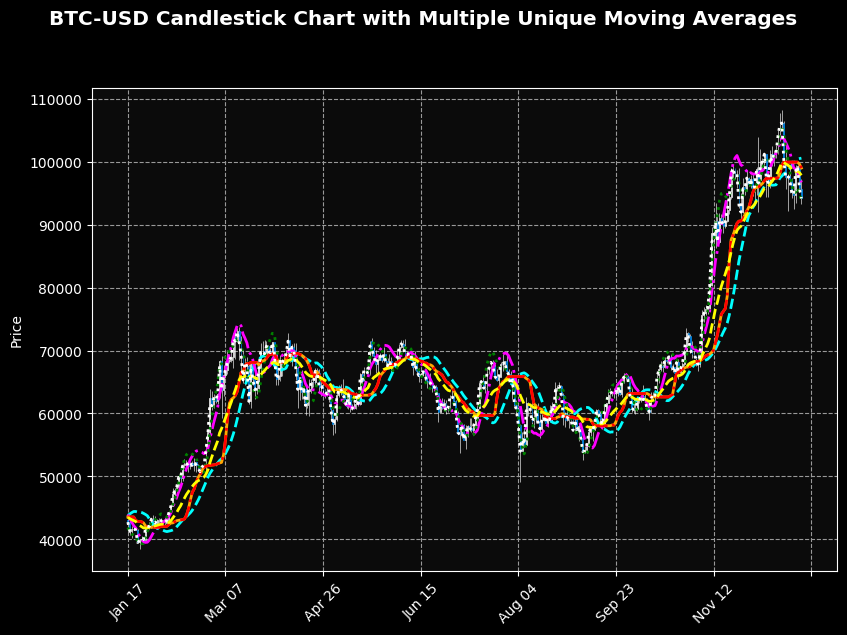

In [35]:
import numpy as np
import yfinance as yf
import mplfinance as mpf

# Define the ALMA function
def alma(series, window, offset=0.85, sigma=6):
    w = np.exp(-0.5 * ((np.arange(window) - offset * (window - 1)) / sigma) ** 2)
    w /= w.sum()
    return np.convolve(series, w, mode='valid')

# Define the LSMA function
def lsma(series, window):
    return [np.polyval(np.polyfit(range(window), series[i:i+window], 1), window-1)
            for i in range(len(series) - window + 1)]

# Define the PRMA function
def prma(series, window, degree=2):
    return [np.polyval(np.polyfit(range(window), series[i:i+window], degree), window-1)
            for i in range(len(series) - window + 1)]

# Define the MMA function
def mma(series, window):
    return [np.median(series[i:i+window]) for i in range(len(series) - window + 1)]

# Define the QMA function
def qma(series, window, quantile=0.5):
    return [np.quantile(series[i:i+window], quantile) for i in range(len(series) - window + 1)]

# Define the RMA function
def rma(series, alpha=0.1):
    rma_values = [series[0]]
    for i in range(1, len(series)):
        rma_values.append(alpha * series[i] + (1 - alpha) * rma_values[-1])
    return np.array(rma_values)

# Define the MGMA function
def mgma(series, window):
    mg = [series[0]]
    for i in range(1, len(series)):
        mg.append(mg[-1] + (series[i] - mg[-1]) / max(1, (series[i] / mg[-1]) ** 2))
    return mg

# Define the stock symbol and time period
symbol = 'BTC-USD'
start_date = '2023-12-29'
end_date = '2024-12-29'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)

# Ensure the columns are named correctly for mplfinance
df.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df.ffill(inplace=True)

# Apply each moving average to the 'Close' price
window = 20  # Window size for moving averages
alma_series = alma(df['Close'].values, window)
lsma_series = lsma(df['Close'].values, window)
prma_series = prma(df['Close'].values, window)
mma_series = mma(df['Close'].values, window)
qma_series = qma(df['Close'].values, window)
rma_series = rma(df['Close'].values, alpha=0.1)
mgma_series = mgma(df['Close'].values, window)

# Align moving average outputs with the original data (valid convolution shortens the series)
df_trimmed = df.iloc[window - 1:].copy()  # Trim original data to match moving average lengths

# Add moving averages to the trimmed dataframe
df_trimmed['ALMA'] = alma_series
df_trimmed['LSMA'] = lsma_series
df_trimmed['PRMA'] = prma_series
df_trimmed['MMA'] = mma_series
df_trimmed['QMA'] = qma_series
df_trimmed['RMA'] = rma_series[-len(df_trimmed):]  # Align RMA length to the trimmed dataframe
df_trimmed['MGMA'] = mgma_series[-len(df_trimmed):]  # Align MGMA length to the trimmed dataframe

# Prepare the moving average lines for mplfinance with style improvements
alma_plot = mpf.make_addplot(df_trimmed['ALMA'], color='cyan', width=2, linestyle='--')
lsma_plot = mpf.make_addplot(df_trimmed['LSMA'], color='magenta', width=2, linestyle='-.')
prma_plot = mpf.make_addplot(df_trimmed['PRMA'], color='green', width=2, linestyle=':')
mma_plot = mpf.make_addplot(df_trimmed['MMA'], color='orange', width=2, linestyle='solid')
qma_plot = mpf.make_addplot(df_trimmed['QMA'], color='red', width=2, linestyle='-.')
rma_plot = mpf.make_addplot(df_trimmed['RMA'], color='yellow', width=2, linestyle='--')
mgma_plot = mpf.make_addplot(df_trimmed['MGMA'], color='white', width=2, linestyle=':')

# Customize chart style and layout
style = mpf.make_mpf_style(
    base_mpf_style='nightclouds',
    rc={'axes.grid': True, 'grid.color': 'gray', 'grid.linestyle': '--'}
)

# Plot the candlestick chart with all moving averages overlay
mpf.plot(
    df_trimmed,
    type='candle',
    addplot=[alma_plot, lsma_plot, prma_plot, mma_plot, qma_plot, rma_plot, mgma_plot],
    title=f'{symbol} Candlestick Chart with Multiple Unique Moving Averages',
    style=style,
    ylabel='Price',
    figratio=(12,8),  # Optional: Adjust figure size for better visibility
    figscale=1.2  # Optional: Scale up the plot
)
